In [1]:
import pandas as pd

In [2]:
df_usuarios = pd.read_csv('MEQ_usuarios_edges.csv')
df_tbip = pd.read_csv('MEQ_tbip.csv')
df_tweets = pd.read_csv('MEQ_tweets.csv')

#### Change screen_name to user_id

In [122]:
dic_screen = {}
for _, row in df_tweets.iterrows():
    user_id = row.user_id
    screen = row.screen_name
    if user_id not in dic_screen:
        dic_screen[screen] = user_id

In [123]:
def screen2id(name):
    if name not in dic_screen:
        return 'None'
    user_id = dic_screen[name]
    return user_id

df_usuarios['user1_id'] = df_usuarios.user1.apply(screen2id)
df_usuarios['user2_id'] = df_usuarios.user2.apply(screen2id)

#### Filter edge list

In [124]:
usuarios_tbip = df_tbip.author.to_list()
usuarios_tbip[:3]

[1.0007909383384146e+18, 1.0019414975693088e+18, 1.0023751533078692e+18]

In [125]:
df_usuarios = df_usuarios[df_usuarios.user2_id.isin(usuarios_tbip)]
df_usuarios = df_usuarios[df_usuarios.user1_id.isin(usuarios_tbip)]
len(df_usuarios)

5859

In [126]:
df_usuarios

,user1,user2,user1_id,user2_id
9,0scaarx,CbaRock86,1222082475276587008.0,2231849132.0
12,0scaarx,ElisaLoncon,1222082475276587008.0,376516710.0
13,0scaarx,FVillanelo,1222082475276587008.0,1066898040.0
16,0scaarx,JorgeSharp,1222082475276587008.0,68917670.0
18,0scaarx,Mister_Wolf_0,1222082475276587008.0,3054738225.0
...,...,...,...,...
28619,trigorosa,urrutilaubreaux,110517361.0,1356010994858926080.0
28638,upelienta_sss,veronica_amada,104357575.0,1232690256.0
28639,upelienta_sss,viarredondo,104357575.0,167251178.0
28640,upelienta_sss,yasna_cardenasx,104357575.0,2505163157.0


In [127]:
users_ids = df_usuarios[['user1_id', 'user2_id']]
users_ids.to_csv('MEQ_users_id_edges.txt', header=None, index=None, sep='\t', mode='a')

#### Revisar que se creo correctamente

In [128]:
pd.read_csv('MEQ_users_id_edges.txt', header=None, sep = '\t')

,0,1
0,1.222082e+18,2.231849e+09
1,1.222082e+18,3.765167e+08
2,1.222082e+18,1.066898e+09
3,1.222082e+18,6.891767e+07
4,1.222082e+18,3.054738e+09
...,...,...
11713,1.105174e+08,1.356011e+18
11714,1.043576e+08,1.232690e+09
11715,1.043576e+08,1.672512e+08
11716,1.043576e+08,2.505163e+09


## TBIP features

(-2.0, 2.0)

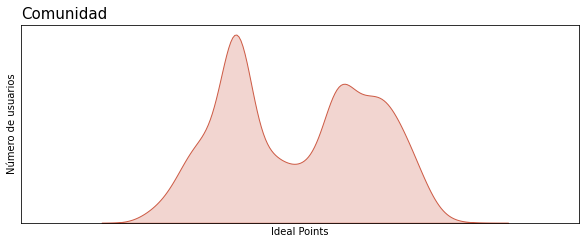

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 8))
plt.subplot(211)
sns.kdeplot(df_tbip['ideal_point'], color = '#CD5B45', fill=True)
plt.xticks([],[])
plt.yticks([],[])
plt.xlabel('')
plt.ylabel('Número de usuarios')
plt.xlabel('Ideal Points')
plt.title('Comunidad', loc='left', size=15)
plt.xlim(-2,2)

In [141]:
def asignar(score):
    if score > 0:
        return 1
    else:
        return 0

df_tbip['idx'] = df_tbip.index
nodefeat = df_tbip[['author', 'ideal_point']]
nodefeat['comm'] = nodefeat.ideal_point.apply(asignar)
nodefeat = nodefeat[['author', 'comm']]
nodefeat.to_csv('MEQ_nodefeat_comm.txt', header=None, sep = '\t')

C:\Users\Max\AppData\Local\Temp/ipykernel_10512/2746869492.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodefeat['comm'] = nodefeat.ideal_point.apply(asignar)


In [144]:
featname = pd.DataFrame({'att': [0, 1], 'name': ['izquierda', 'derecha']})
#featname = df_tbip[['idx', 'ideal_point']]

featname.to_csv('MEQ_featname_comm.txt', header=None, sep='\t')

### Veamos

In [74]:
arch = open('MEQ_cmtyvv.txt', 'r')
for line in arch:
    print(line)

2266	2233	2142	2206	2218	2078	2410	2464	2123	2240	1993	2229	2340	2244	2507	2309	2131	2088	2604	2220	2073	2611	2560	1983	2188	1943	2602	2607	2369	2090	2201	2590	2059	2150	1938	2118	1946	2172	2586	1962	2331	2601	2030	1917	2564	2428	2625	2184	2593	2290	2275	2324	2064	2615	2624	2542	2103	2326	1985	2526	2139	2323	2104	2414	2271	2395	2500	2093	2347	1984	2354	2492	2409	2376	2381	2600	2356	2339	2630	2045	1971	2043	2140	2553	2655	2374	1979	2124	2460	2352	2190	2033	2638	1966	2363	2069	2108	2578	2200	2520	2559	2278	2074	2037	2404	2550	2549	2619	2020	2121	2482	2423	2370	2154	2446	1918	2308	2112	2543	2253	2408	1929	2299	2573	2561	2348	2276	2005	2654	2095	2257	2433	2504	1986	2359	2551	2040	2430	2122	2083	2307	2386	2521	2212	2546	2495	2469	2539	2063	2086	2468	2485	2115	2575	1997	2109	2216	2084	2646	2556	2261	2165	2467	2077	2334	2484	2046	2623	2329	1925	1953	2506	2237	2579	2098	2631	2418	2306	2300	2552	2477	2563	2532	2489	1941	2056	2213	2060	2574	2591	2210	2179	2554	2462	2164	2392	2407	2499	1989	2478	